# New Section

In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [5]:
train.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [7]:
skewness = train.drop(['id', 'Hardness'], axis=1).apply(lambda x: skew(x))


allelectrons_Total       39.927707
density_Total             9.763443
allelectrons_Average      1.659914
val_e_Average            -2.347660
atomicweight_Average      1.797366
ionenergy_Average        -3.548203
el_neg_chi_Average       -3.466318
R_vdw_element_Average    -4.671554
R_cov_element_Average    -0.543810
zaratio_Average          -1.318423
density_Average           1.657180
dtype: float64


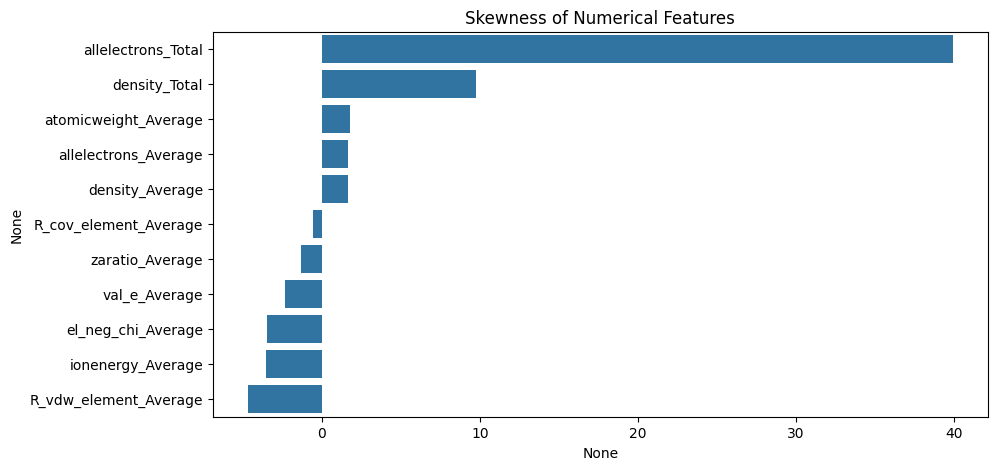

In [8]:
skewness = skewness[abs(skewness) > 0.5]
print(skewness)

skew_features = train[skewness.index]
skewness = skewness.sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=skewness, y=skewness.index)
plt.title('Skewness of Numerical Features')
plt.show()

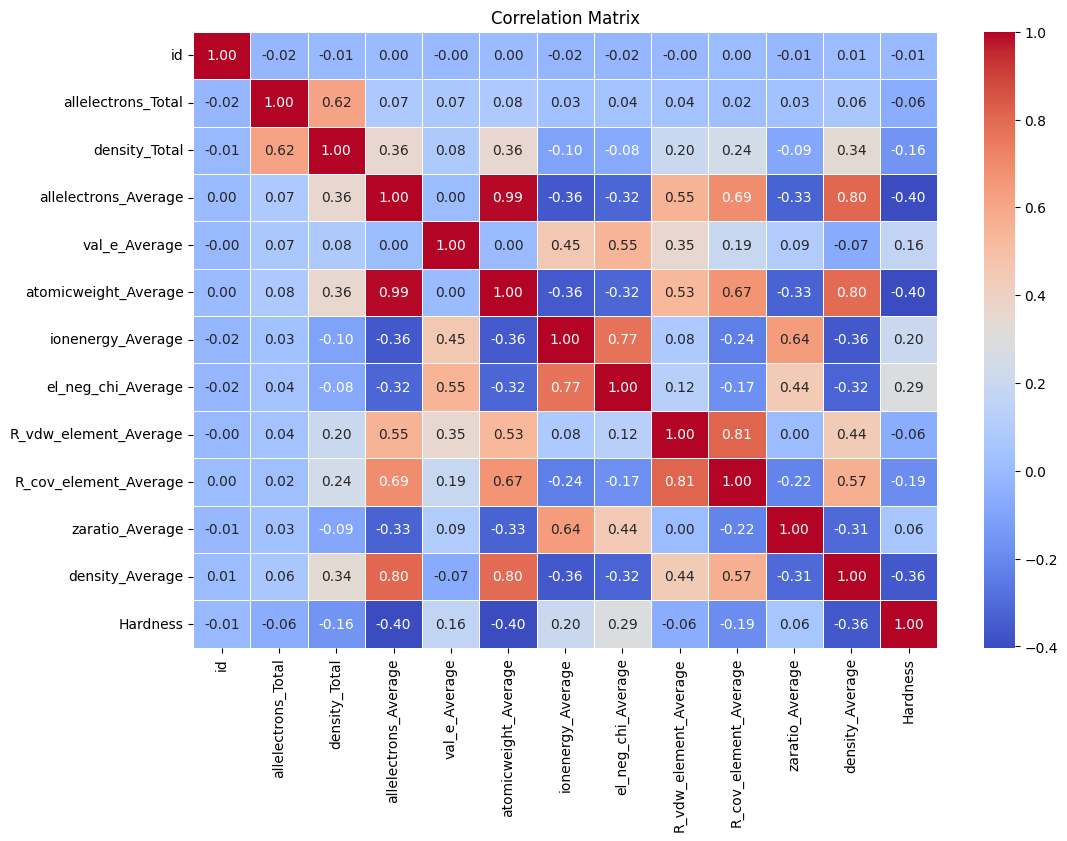

In [9]:
correlation_matrix = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

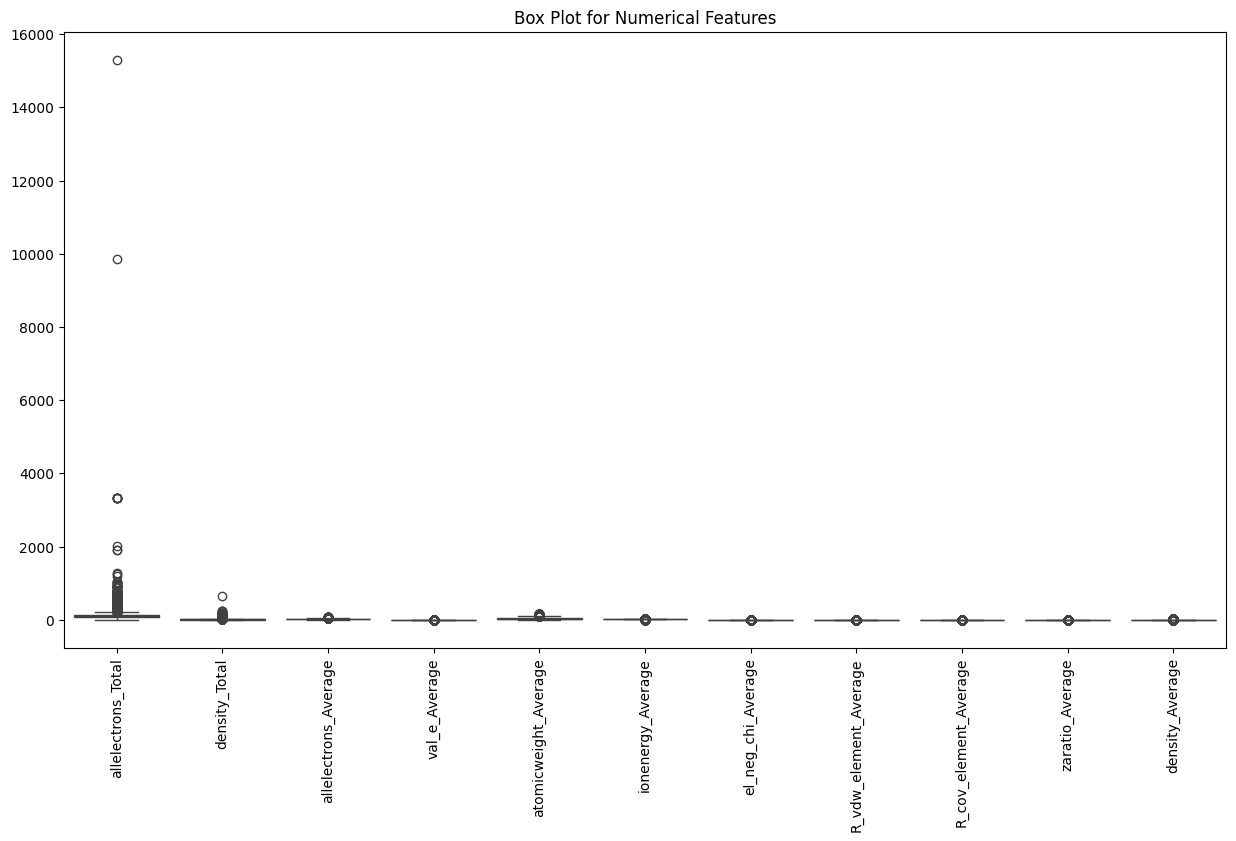

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train.drop(['id','Hardness'], axis=1))
plt.title('Box Plot for Numerical Features')
plt.xticks(rotation=90)
plt.show()

In [11]:
X = train.drop(['id','Hardness'],axis=1)
y = train['Hardness']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scalar = scaler.transform(X_train)
X_test_scalar = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scalar, y_train)

LinearRegression()

In [15]:
prediction = model.predict(X_test_scalar)

In [16]:
mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.105493781448889


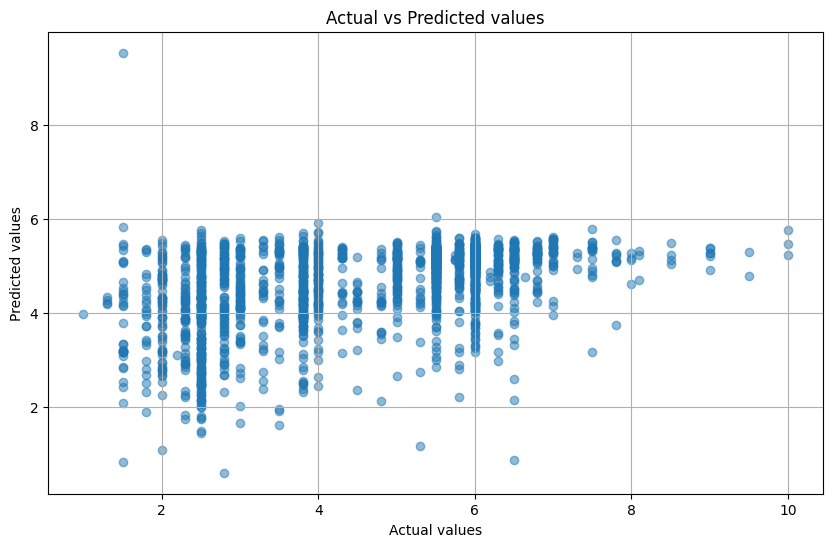

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, prediction, alpha=0.5)
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

In [18]:
submission_ids = test['id']
test_data_numeric = test.drop(['id'], axis=1)
test_data_scaled = scaler.transform(test_data_numeric)
test_prediction = model.predict(test_data_scaled)
submission = pd.DataFrame({'id': submission_ids, 'Hardness': test_prediction})
submission.to_csv('submission.csv', index=False)
submission

,id,Hardness
0,10407,3.474654
1,10408,4.824525
2,10409,5.290989
3,10410,5.274703
4,10411,5.117155
...,...,...
6934,17341,5.494298
6935,17342,4.537835
6936,17343,5.456207
6937,17344,4.323472
